In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('Iris.csv').drop(labels='Id', axis=1)

In [6]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

## Label Encode Categorical Variables

In [ ]:
# <<--- Label Encode 'Species' variable --->>

In [12]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])

In [13]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Pair Plot

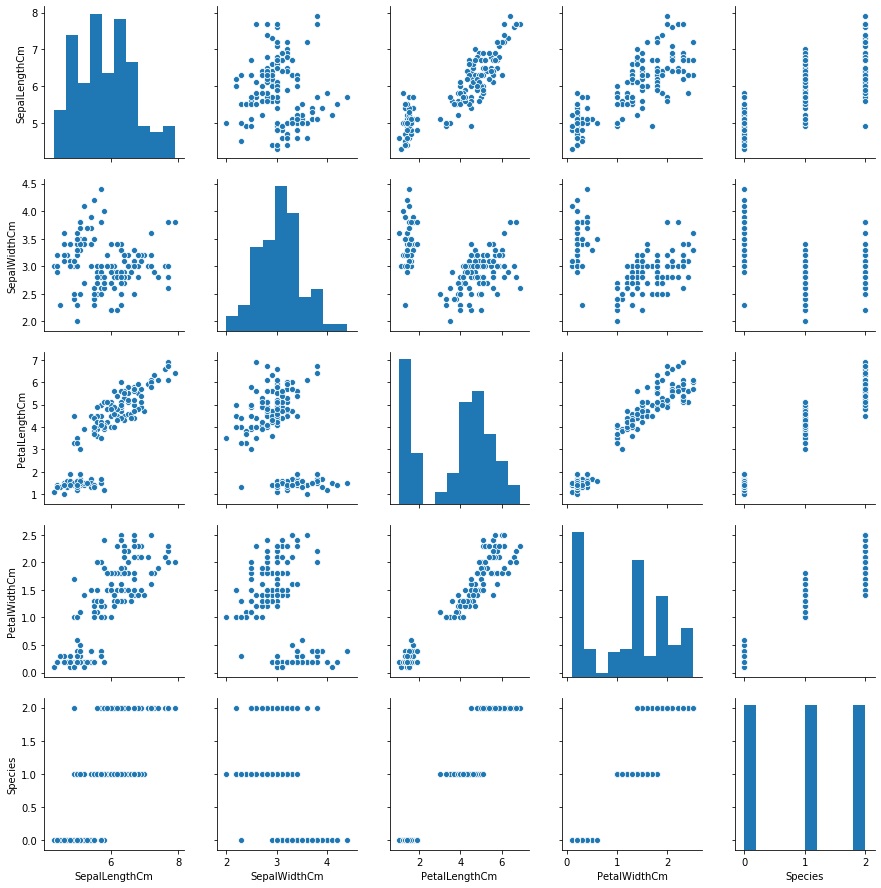

In [15]:
sns.pairplot(df)

## Correlation Matrix

(5.0, 0.0)

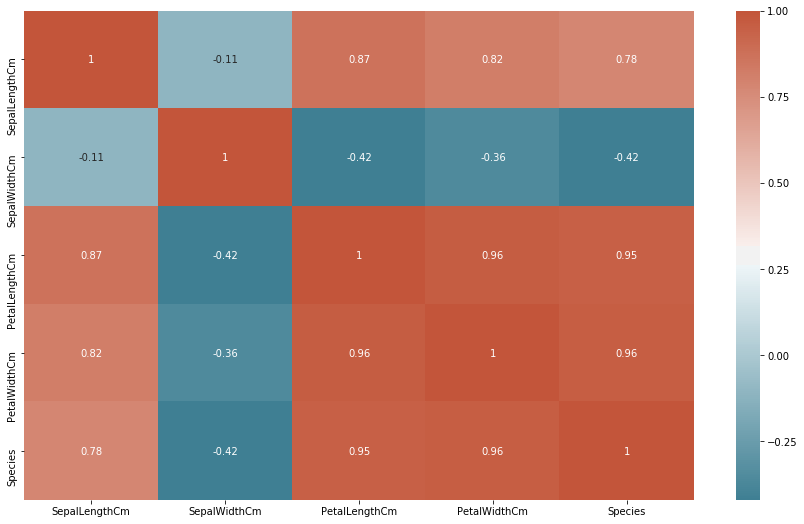

In [22]:
corr = df.corr()

plt.subplots(figsize=(15,9))

ax = sns.heatmap(corr, xticklabels=corr.columns,
                yticklabels=corr.columns, annot=True,
                cmap=sns.diverging_palette(220, 20, as_cmap=True))

# below two lines are just to put the heat map or matrix properly 
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

## Dependent and Independent Variables

In [26]:
X = df.iloc[:, :-1].values
Y = df['Species'].values

## Train Test Split

In [28]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.75, test_size=0.25, random_state=0) 

# Model

## Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=10, criterion='gini', random_state=0) 
classifier.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [30]:
# <<-- Check the best Random Forest by parameter tuning -->>

from sklearn.model_selection import GridSearchCV

parameters = [{'criterion':['entropy', 'gini'], 'min_samples_split':[2, 4, 8], 'n_estimators':[10, 15, 20, 25, 30]}]

grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy', 
                           cv = 10,
                           n_jobs = -1)

grid_search = grid_search.fit(x_train, y_train)

best_accuracy = grid_search.best_score_   
best_parameters = grid_search.best_params_  

print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 95.54 %
Best Parameters: {'criterion': 'entropy', 'min_samples_split': 8, 'n_estimators': 15}


In [31]:
# Make new Random Forest model with best parameters

classifier4 = RandomForestClassifier(n_estimators=15, criterion='entropy', min_samples_split=8,random_state=0) 
classifier4.fit(x_train, y_train)
predicted_values = classifier4.predict(x_test)

In [33]:
# Evaluation of the model

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

print(f'Accuracy: {accuracy_score(y_test, predicted_values)}\n')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, predicted_values)}\n')
print(classification_report(y_test, predicted_values))

Accuracy: 0.9736842105263158

Confusion Matrix: 
[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



In [37]:
compare_values_df = pd.DataFrame(data=list(zip(y_test, predicted_values)), columns=['Real Values', 'Predicted Values'])
compare_values_df.head()

,Real Values,Predicted Values
0,2,2
1,1,1
2,0,0
3,2,2
4,0,0


# Save Model

In [38]:
import pickle 

with open('Model.txt','wb') as f:
    pickle.dump(classifier, f)